In [1]:
import pylineament as ln
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import linregress


In [2]:
df, dem, extent,crs_espg = ln.read_raster('e_kal_crop2.tif') 
dem_hillshade = ln.hillshade(dem)

In [3]:
lines = ln.dem_to_shp('e_kal_crop2.tif')

In [4]:
lines

,quad,group,min_x,max_x,min_y,max_y,L,deg,length,crs
0,0.0,21.0,113.508835,113.533019,1.430942,1.419063,30.0,116.169544,0.026944,4326
1,0.0,37.0,113.657039,113.683793,1.420261,1.423471,30.0,83.154509,0.026946,4326
2,0.0,54.0,113.686994,113.713899,1.424469,1.425959,30.0,86.828771,0.026946,4326
3,0.0,59.0,113.423820,113.459712,1.426088,1.424493,40.0,92.545750,0.035928,4326
4,0.0,75.0,113.603371,113.620992,1.428026,1.424534,20.0,101.212795,0.017964,4326
...,...,...,...,...,...,...,...,...,...,...
2490,5.0,196.0,114.190573,114.207927,1.326153,1.321512,20.0,104.977677,0.017964,4326
2491,5.0,201.0,114.221247,114.239101,1.325302,1.327286,20.0,83.658247,0.017964,4326
2492,5.0,202.0,114.206741,114.215722,1.325867,1.325926,10.0,89.618669,0.008982,4326
2493,5.0,236.0,114.217519,114.235085,1.364718,1.360960,20.0,102.080318,0.017964,4326


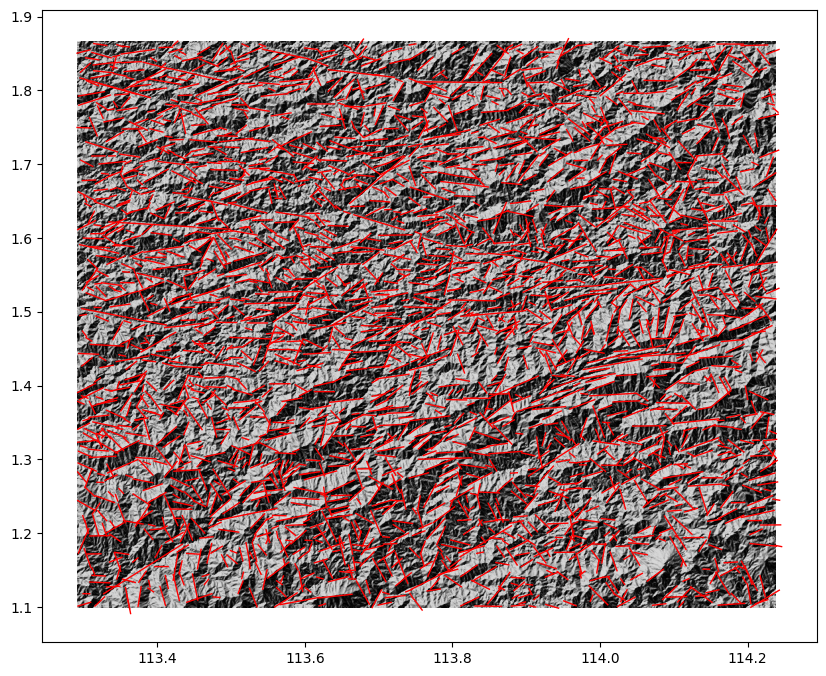

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(dem_hillshade, extent=extent, cmap='gray')

for i in range(len(lines)):
    min_x, max_x, min_y, max_y = lines[['min_x', 'max_x', 'min_y', 'max_y']].values[i]
    plt.plot([min_x,  max_x], [min_y, max_y], color='red', lw=1)

Text(0.5, 1.0, 'Estimated fractal dimension D = 2.705')

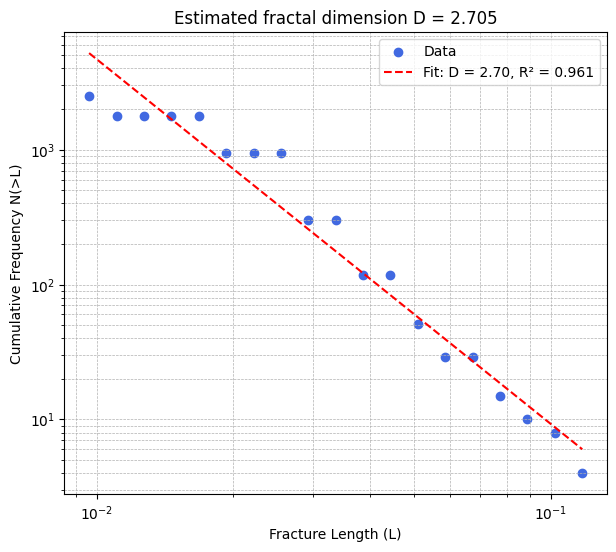

In [6]:
bins = np.logspace(np.log10(min(lines['length'])), np.log10(max(lines['length'])), 20)
counts, edges = np.histogram(lines['length'], bins=bins)
bin_centers = np.sqrt(edges[:-1] * edges[1:])  # geometric mean for log bins
cum_counts = np.cumsum(counts[::-1])[::-1]  # cumulative from large to small
mask = (cum_counts > 0)
logL = np.log10(bin_centers[mask])
logN = np.log10(cum_counts[mask])
slope, intercept, r, p, stderr = linregress(logL, logN)
D_est = -slope

plt.figure(figsize=(7,6))
plt.scatter(bin_centers, cum_counts, color='royalblue', label='Data')
plt.plot(bin_centers, 10**intercept * bin_centers**slope, 'r--',
         label=f'Fit: D = {D_est:.2f}, R² = {r**2:.3f}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Fracture Length (L)')
plt.ylabel('Cumulative Frequency N(>L)')
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.title(f"Estimated fractal dimension D = {D_est:.3f}")


<BarContainer object of 24 artists>

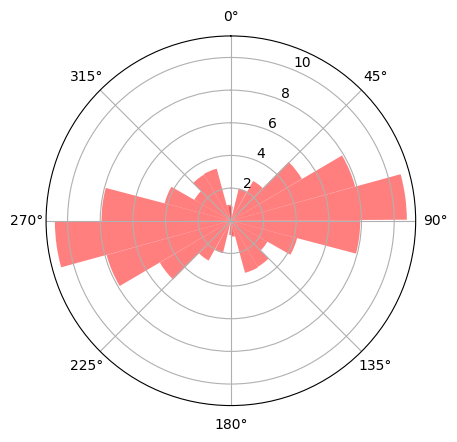

In [7]:
diff = 15
bins = np.arange(0,361,diff)
counts, edges = np.histogram(lines['deg'], weights= lines['length'],bins=bins)
bin_centers = np.sqrt(edges[:-1] * edges[1:])


fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

ax.bar(np.radians(bin_centers), counts, width=np.radians(diff), color='red', alpha=0.5)
ax.bar(np.radians(bin_centers+180), counts, width=np.radians(diff), color='red', alpha=0.5)